In [65]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import geopandas as gpd

clubs_df = pd.read_feather('../cleaned_data/clubs.feather')
games_df = pd.read_feather('../cleaned_data/games.feather')
club_games_df = pd.read_feather('../cleaned_data/club_games.feather')
players_df = pd.read_feather('../cleaned_data/players.feather')

# Teams Stats
Visualizzazioni riguardanti le statistiche delle squadre, sia club che nazionali

### Statistiche Nazionali

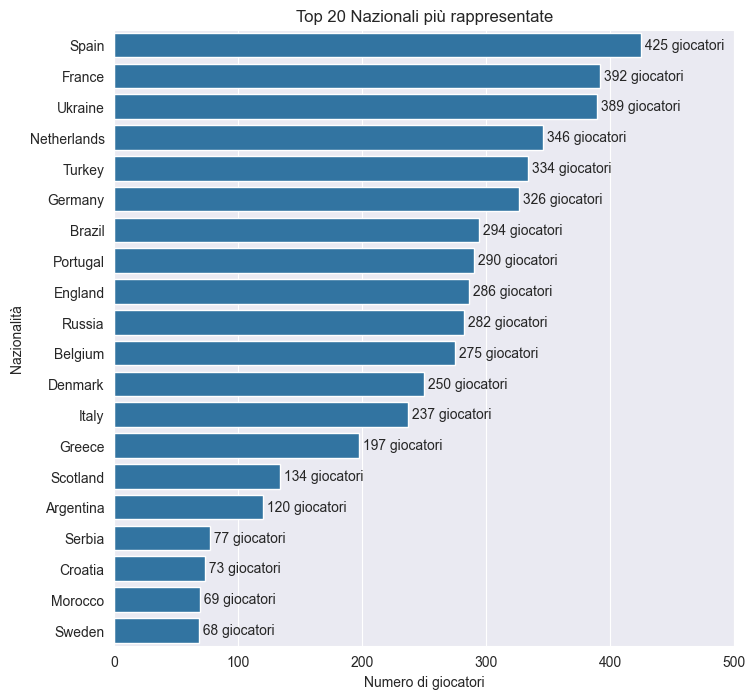

In [66]:
# nazionali con più giocatori

nat_count = players_df['nationality'].value_counts().head(20)

plt.figure(figsize=(8, 8))
ax = sns.barplot(x=nat_count.values, y=nat_count.index)

for p in ax.patches:
    ax.annotate(f' {p.get_width():.0f} giocatori', ((p.get_width()), p.get_y() + p.get_height() / 2), ha='left', va='center')

plt.title('Top 20 Nazionali più rappresentate')
plt.xlabel('Numero di giocatori')
plt.ylabel('Nazionalità')
plt.xlim(0,500)
plt.show()

In [88]:
# uniamo i giocatori perchè nel dataframe delle aree geografiche c'è il Regno Unito e non le singole nazionali

players_df_uk = players_df.copy()

uk_nationalities = ["England", "Scotland", "Wales", "Northern Ireland"]
players_df_uk['nationality'] = players_df_uk['nationality'].replace(uk_nationalities, "United Kingdom")

players_df_uk.query('nationality == "United Kingdom"').head(10)

,first_name,last_name,full_name,last_season,club_id,player_code,country_of_birth,city_of_birth,nationality,date_of_birth,...,market_value_in_eur,highest_market_value_in_eur,image_url,player_profile_url,league_id,club_name,height_in_m,market_value_mln,highest_market_value_mln,age
player_id,,,,,,,,,,,,,,,,,,,,,
40204,Joe,Hart,Joe Hart,2023,371,joe-hart,England,Shrewsbury,United Kingdom,1987-04-19,...,1500000.0,24000000.0,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/joe-hart/profi...,SC1,Celtic FC,1.96,1.500,24.00,37
43858,Adam,Legzdins,Adam Legzdins,2023,511,adam-legzdins,England,Penkridge,United Kingdom,1986-11-28,...,150000.0,500000.0,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/adam-legzdins/...,SC1,Dundee FC,1.90,0.150,0.50,37
46106,Adam,Le Fondre,Adam Le Fondre,2023,903,adam-le-fondre,England,Stockport,United Kingdom,1986-12-02,...,400000.0,4000000.0,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/adam-le-fondre...,SC1,Hibernian FC,1.80,0.400,4.00,37
79620,Ali,Crawford,Ali Crawford,2023,2578,ali-crawford,Scotland,Lanark,United Kingdom,1991-07-30,...,350000.0,800000.0,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/ali-crawford/p...,SC1,St. Johnstone FC,1.79,0.350,0.80,32
85177,Nathaniel,Clyne,Nathaniel Clyne,2023,873,nathaniel-clyne,England,London,United Kingdom,1991-04-05,...,2000000.0,21000000.0,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/nathaniel-clyn...,GB1,Crystal Palace,1.75,2.000,21.00,33
173192,Mikey,Devlin,Mikey Devlin,2023,1241,mikey-devlin,Scotland,Motherwell,United Kingdom,1993-10-03,...,300000.0,600000.0,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/mikey-devlin/p...,SC1,Livingston FC,1.88,0.300,0.60,30
216270,Ricki,Lamie,Ricki Lamie,2023,511,ricki-lamie,Scotland,Shotts,United Kingdom,1993-06-20,...,375000.0,400000.0,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/ricki-lamie/pr...,SC1,Dundee FC,1.85,0.375,0.40,31
226151,Sean,Kelly,Sean Kelly,2023,1241,sean-kelly,Scotland,Glasgow,United Kingdom,1993-11-01,...,400000.0,400000.0,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/sean-kelly/pro...,SC1,Livingston FC,1.88,0.400,0.40,30
238029,Liam,Gordon,Liam Gordon,2023,2578,liam-gordon,Scotland,Perth,United Kingdom,1996-01-26,...,500000.0,550000.0,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/liam-gordon/pr...,SC1,St. Johnstone FC,1.83,0.500,0.55,28


In [68]:
from config import *

world = gpd.read_file(f'{folder_path}/geographic_data/ne_110m_admin_0_countries.shp')
europe = world.query('CONTINENT == "Europe"')

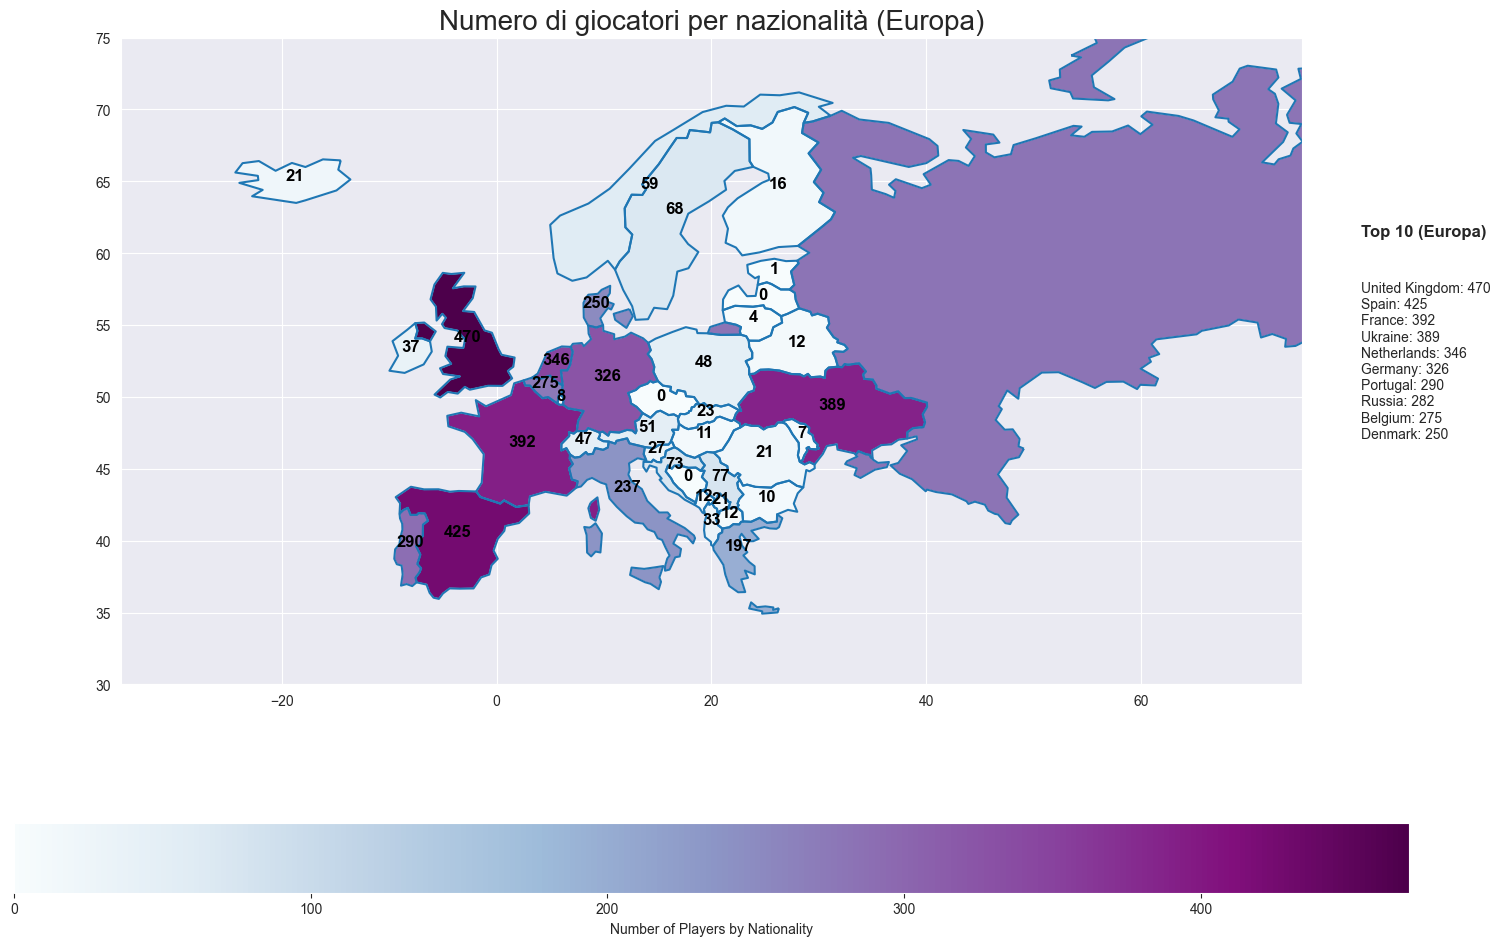

In [87]:
# mappa del numero di giocatori per nazione (Europa)

player_counts = players_df_uk['nationality'].value_counts().reset_index()
player_counts.columns = ['nationality', 'count']

players_by_nation_eu = europe.merge(player_counts, left_on='NAME', right_on='nationality', how='left').fillna(0)

top_10_nations = players_by_nation_eu[['nationality', 'count']].nlargest(10, 'count')


fig, ax = plt.subplots(1, 1, figsize=(18, 12))
players_by_nation_eu.boundary.plot(ax=ax)
players_by_nation_eu.plot(column='count',
           ax=ax,
           cmap='BuPu',
           legend=True,
           legend_kwds={'label': "Number of Players by Nationality",
                        'orientation': "horizontal"})

# Annotations: code by ChatGPT
for idx, row in players_by_nation_eu.iterrows():
    if row['geometry'].geom_type == 'MultiPolygon':
        main_polygon = max(row['geometry'].geoms, key=lambda a: a.area)
        centroid = main_polygon.centroid
    else:
        centroid = row['geometry'].centroid
    
    plt.annotate(text=int(row['count']),
                 xy=(centroid.x, centroid.y),
                 horizontalalignment='center',
                 fontsize=12, weight='bold', color='black')

# Top10 Legend: code by ChatGPT
legend_title = "Top 10 (Europa)"
legend_text = '\n'.join([f'{row.nationality}: {row["count"]:.0f}' for _, row in top_10_nations.iterrows()])
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax.text(1.05, 0.7, legend_title, transform=ax.transAxes, fontsize=12, weight='bold',
        verticalalignment='center', bbox=props)
ax.text(1.05, 0.5, legend_text, transform=ax.transAxes, fontsize=10,
        verticalalignment='center', bbox=props)


# Limiti di latitudine e longitudine per l'Europa
ax.set_xlim(-35, 75)
ax.set_ylim(30, 75)

plt.title('Numero di giocatori per nazionalità (Europa)', fontsize=20)
plt.show()

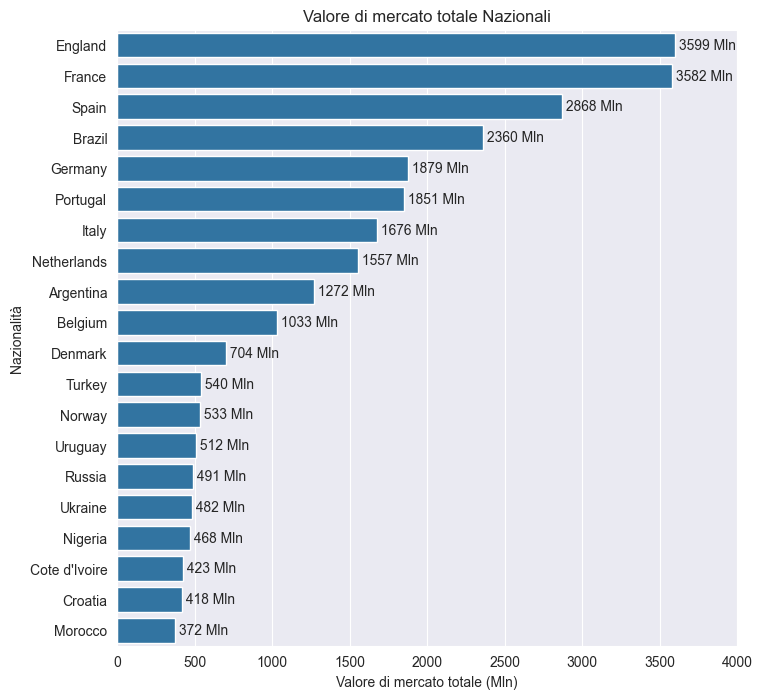

In [62]:
# VDM totale per nazionalità

market_value_by_nationality = players_df.groupby('nationality')['market_value_mln'].sum().reset_index()
market_value_by_nationality = market_value_by_nationality.sort_values(by='market_value_mln', ascending=False).head(20)

plt.figure(figsize=(8, 8))
ax = sns.barplot(data=market_value_by_nationality, y='nationality', x='market_value_mln')

for p in ax.patches:
    ax.annotate(f' {p.get_width():.0f} Mln', ((p.get_width()), p.get_y() + p.get_height() / 2), ha='left', va='center')

plt.title('Valore di mercato totale Nazionali')
plt.xlabel('Valore di mercato totale (Mln)')
plt.ylabel('Nazionalità')
plt.xlim(0,4000)
plt.show()

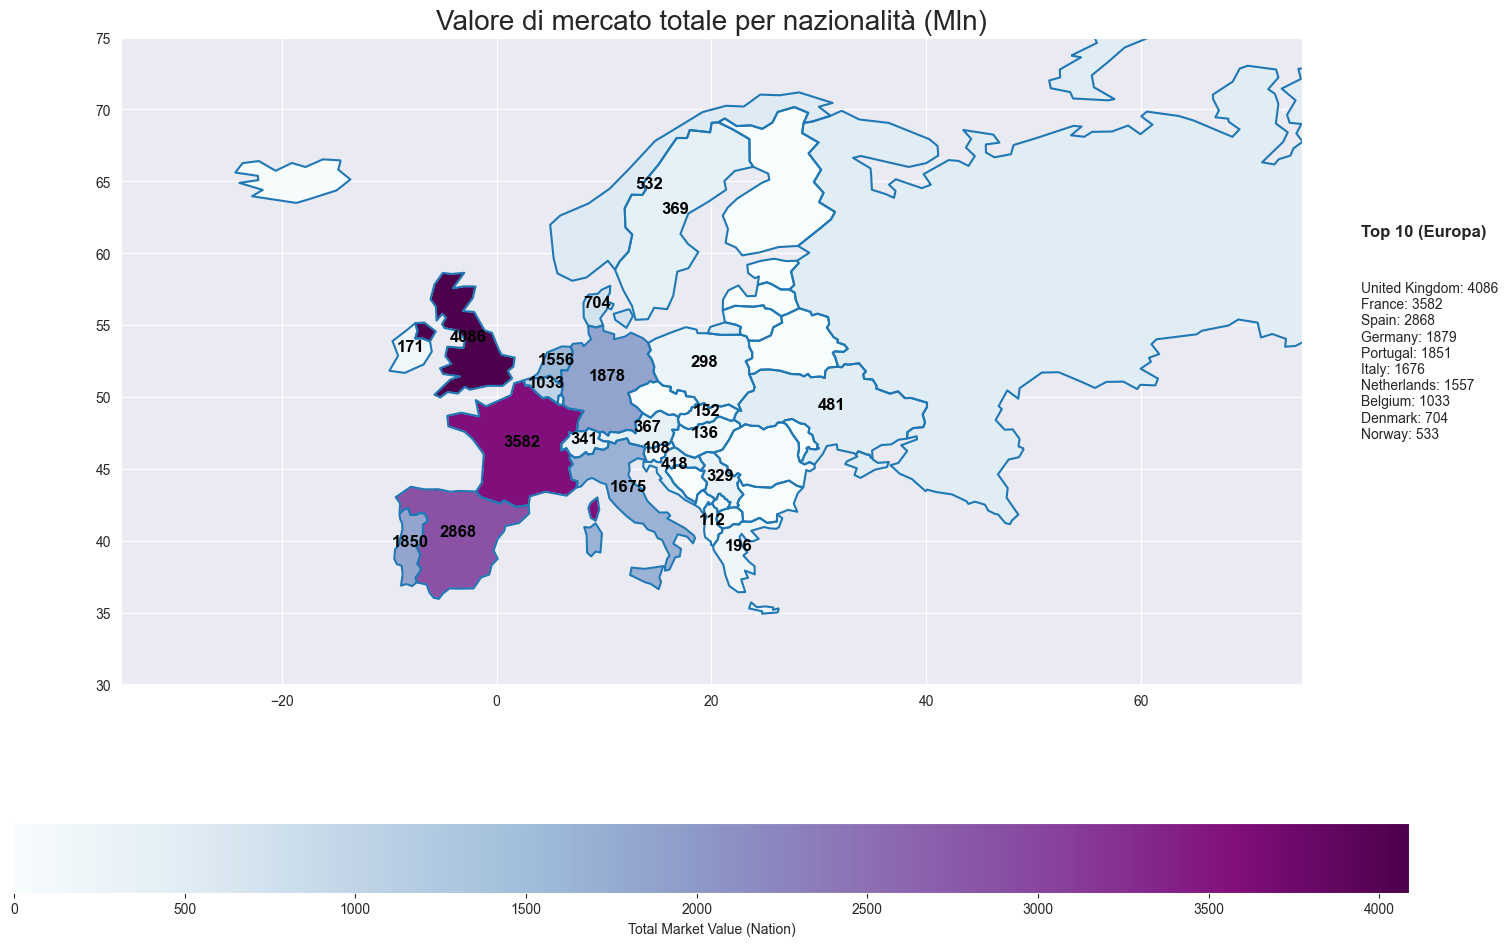

In [89]:
# mappa del valore di mercato totale per ogni nazione (Europa)

market_values = players_df_uk.groupby('nationality')['market_value_mln'].sum().reset_index()
market_values = market_values.sort_values(by='market_value_mln', ascending=False)
market_values.columns = ['nationality', 'nation_value']

nations_vdm_eu = europe.merge(market_values, left_on='NAME', right_on='nationality', how='left').fillna(0)
top_10_nations_vdm = nations_vdm_eu[['nationality', 'nation_value']].nlargest(10, 'nation_value')


fig, ax = plt.subplots(1, 1, figsize=(18, 12))
nations_vdm_eu.boundary.plot(ax=ax)
nations_vdm_eu.plot(column='nation_value',
           ax=ax,
           cmap='BuPu',
           legend=True,
           legend_kwds={'label': "Total Market Value (Nation)",
                        'orientation': "horizontal"})

# Annotations: code by ChatGPT
for idx, row in nations_vdm_eu.iterrows():
    if row['nation_value'] > 100:
        if row['geometry'].geom_type == 'MultiPolygon':
            main_polygon = max(row['geometry'].geoms, key=lambda a: a.area)
            centroid = main_polygon.centroid
        else:
            centroid = row['geometry'].centroid
    
        plt.annotate(text=int(row['nation_value']),
                 xy=(centroid.x, centroid.y),
                 horizontalalignment='center',
                 fontsize=12, weight='bold', color='black')

# Top10 Legend: code by ChatGPT
legend_title = "Top 10 (Europa)"
legend_text = '\n'.join([f'{row.nationality}: {row["nation_value"]:.0f}' for _, row in top_10_nations_vdm.iterrows()])
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax.text(1.05, 0.7, legend_title, transform=ax.transAxes, fontsize=12, weight='bold',
        verticalalignment='center', bbox=props)
ax.text(1.05, 0.5, legend_text, transform=ax.transAxes, fontsize=10,
        verticalalignment='center', bbox=props)


# Limiti di latitudine e longitudine per l'Europa
ax.set_xlim(-35, 75)
ax.set_ylim(30, 75)

plt.title('Valore di mercato totale per nazionalità (Mln)', fontsize=20)
plt.show()

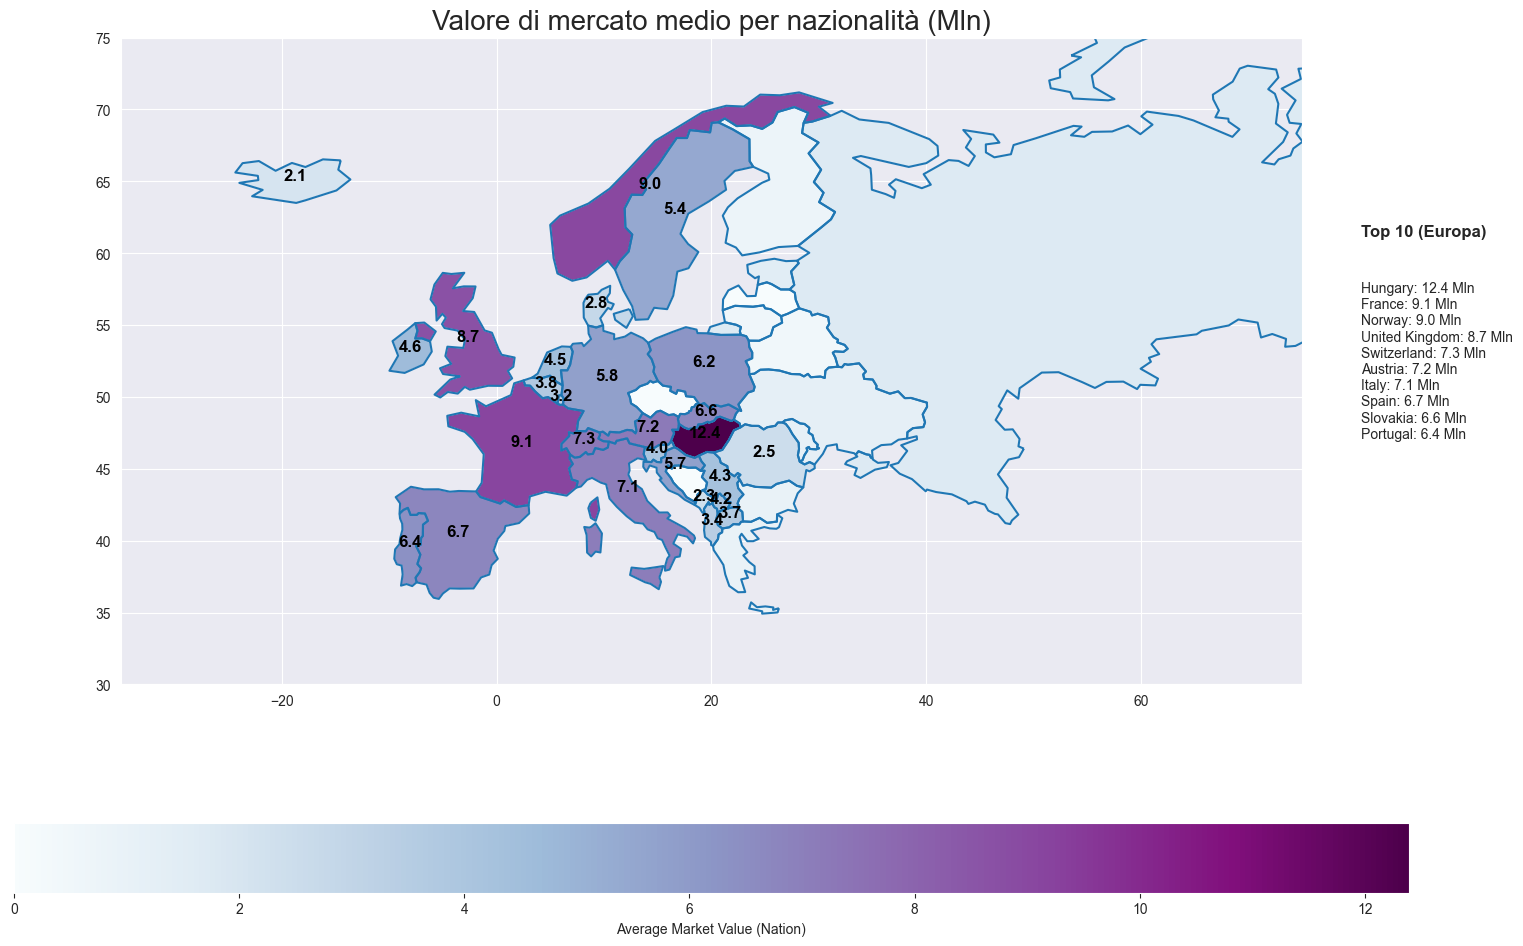

In [103]:
# mappa del valore di mercato medio dei calciatori per ogni nazione

merged_df = players_by_nation_eu.merge(nations_vdm_eu, on='nationality')
merged_df['avg_market_value_mln'] = merged_df['nation_value'] / merged_df['count']

avg_values = merged_df[['nationality', 'avg_market_value_mln']]
top_10_avg_vdm = avg_values[['nationality', 'avg_market_value_mln']].nlargest(10, 'avg_market_value_mln')

nations_avg_vdm_eu = europe.merge(avg_values, left_on='NAME', right_on='nationality', how='left').fillna(0)


fig, ax = plt.subplots(1, 1, figsize=(18, 12))
nations_avg_vdm_eu.boundary.plot(ax=ax)
nations_avg_vdm_eu.plot(column='avg_market_value_mln',
                        ax=ax,
                        cmap='BuPu',
                        legend=True,
                        legend_kwds={'label': "Average Market Value (Nation)",
                                     'orientation': "horizontal"})


# Annotations
for idx, row in nations_avg_vdm_eu.iterrows():
    if row['avg_market_value_mln'] > 2: #soglia annotazioni
        if row['geometry'].geom_type == 'MultiPolygon':
            main_polygon = max(row['geometry'].geoms, key=lambda a: a.area)
            centroid = main_polygon.centroid
        else:
            centroid = row['geometry'].centroid
    
        plt.annotate(text=f'{row["avg_market_value_mln"]:.1f}',
                     xy=(centroid.x, centroid.y),
                     horizontalalignment='center',
                     fontsize=12, weight='bold', color='black')

# Top 10 Legend
legend_title = "Top 10 (Europa)"
legend_text = '\n'.join([f'{row.nationality}: {row["avg_market_value_mln"]:.1f} Mln' for _, row in top_10_avg_vdm.iterrows()])
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax.text(1.05, 0.7, legend_title, transform=ax.transAxes, fontsize=12, weight='bold',
        verticalalignment='center', bbox=props)
ax.text(1.05, 0.5, legend_text, transform=ax.transAxes, fontsize=10,
        verticalalignment='center', bbox=props)

# Limiti di latitudine e longitudine per l'Europa
ax.set_xlim(-35, 75)
ax.set_ylim(30, 75)

plt.title('Valore di mercato medio per nazionalità (Mln)', fontsize=20)
plt.show()

In [107]:
players_df[['full_name', 'nationality', 'club_name', 'league_id', 'market_value_mln']].query('nationality == "Hungary"').sort_values(by='market_value_mln', ascending=False)

# i giocatori ungheresi sono pochi, e non essendoci il campionato ungherese sono solo quelli che giocano all'estero, per questo è la nazionale con il vdm medio più alto nonostante non sia una delle nazionali più forti
# lo stesso discorso si può fare anche per nazioni come Norvegia, Svizzera, Slovacchia o Austria

,full_name,nationality,club_name,league_id,market_value_mln
player_id,,,,,
451276,Dominik Szoboszlai,Hungary,Liverpool FC,GB1,70.0
730861,Milos Kerkez,Hungary,AFC Bournemouth,GB1,18.0
263380,Attila Szalai,Hungary,TSG 1899 Hoffenheim,L1,14.0
332798,Roland Sallai,Hungary,SC Freiburg,L1,10.0
93740,Willi Orbán,Hungary,RB Leipzig,L1,10.0
454863,András Schäfer,Hungary,1.FC Union Berlin,L1,5.0
57071,Péter Gulácsi,Hungary,RB Leipzig,L1,5.0
220656,László Kleinheisler,Hungary,Panathinaikos Athens,GR1,1.8
496996,Attila Mocsi,Hungary,Caykur Rizespor,TR1,1.2


### Statistiche Club

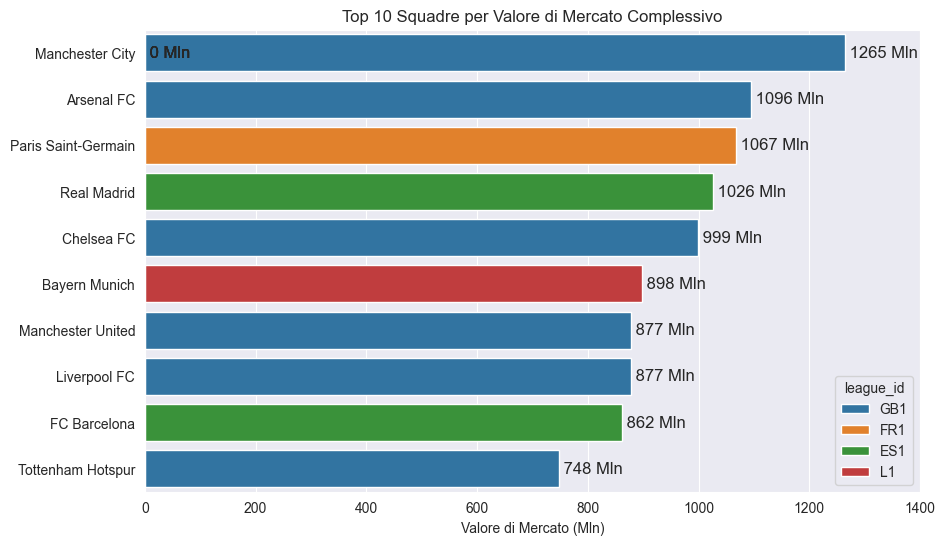

In [63]:
# top 10 squadre VDM

top_10_teams = clubs_df.sort_values(by='total_market_value_mln', ascending=False).head(10)

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top_10_teams, x='total_market_value_mln', y='club_name', hue='league_id')

for p in ax.patches:
    ax.annotate(f' {p.get_width():.0f} Mln', ((p.get_width()), p.get_y() + p.get_height() / 2), ha='left', va='center', fontsize=12)

plt.title('Top 10 Squadre per Valore di Mercato Complessivo')
plt.xlabel('Valore di Mercato (Mln)')
plt.ylabel('')
plt.xlim(0, 1400)
plt.show()

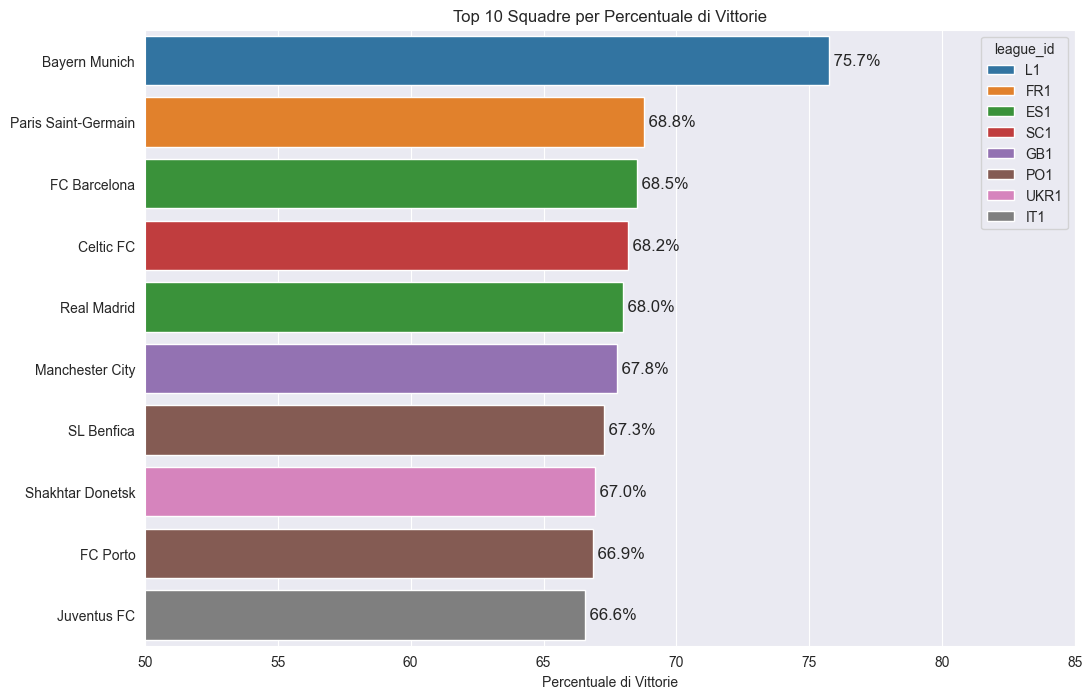

In [64]:
# top 10 squadre per percentuale di vittorie

total_games = club_games_df['club_id'].value_counts().reset_index()
total_games.columns = ['club_id', 'total_games']

club_wins = club_games_df[club_games_df['is_win'] == True]['club_id'].value_counts().reset_index()
club_wins.columns = ['club_id', 'wins']


club_stats = pd.merge(total_games, club_wins, on='club_id', how='left').fillna(0)
club_stats['win_percentage'] = (club_stats['wins'] / club_stats['total_games']) * 100

club_stats = club_stats.merge(clubs_df[['club_id', 'club_name', 'league_id']], on='club_id')

top10_clubs = club_stats.sort_values(by='win_percentage', ascending=False).head(10)


plt.figure(figsize=(12, 8))
ax = sns.barplot(data=top10_clubs, y='club_name', x='win_percentage', hue='league_id')

for i, (value, name) in enumerate(zip(top10_clubs['win_percentage'], top10_clubs['club_name'])):
    ax.text(value, i, f" {value:.1f}%", ha="left", va='center', fontsize=12)

plt.title('Top 10 Squadre per Percentuale di Vittorie')
plt.xlabel('Percentuale di Vittorie')
plt.ylabel('')
plt.xlim(50, 85)
plt.show()

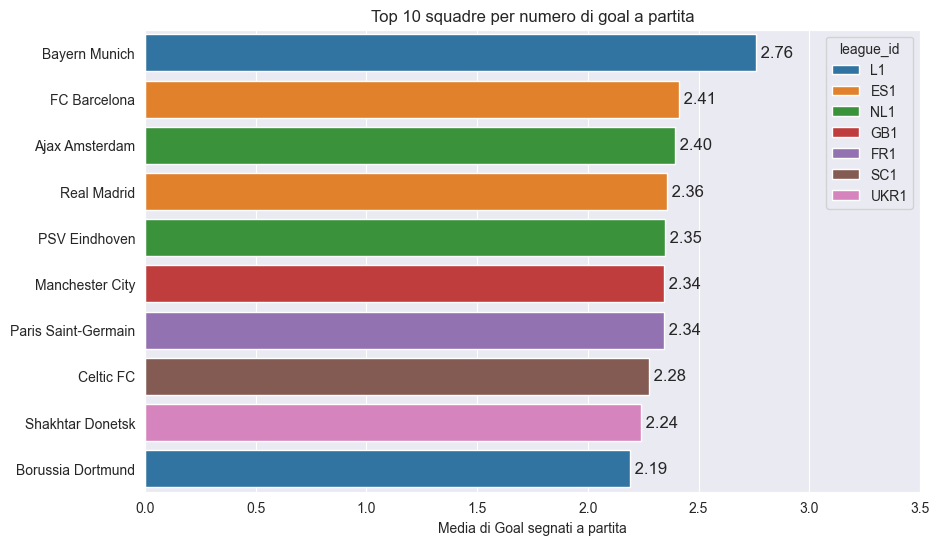

In [65]:
# top 10 squadre per numero di goal segnati

total_games = club_games_df['club_id'].value_counts().reset_index()
total_games.columns = ['club_id', 'total_games']

goals_by_club = club_games_df.groupby('club_id')['club_goals'].sum().reset_index()

club_stats = pd.merge(total_games, goals_by_club, on='club_id')

club_stats['goals_per_game'] = club_stats['club_goals'] / club_stats['total_games']

club_stats = club_stats.merge(clubs_df[['club_id', 'club_name', 'league_id']], on='club_id')

top10_clubs = club_stats.sort_values(by='goals_per_game', ascending=False).head(10)


plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top10_clubs, x='goals_per_game', y='club_name', hue='league_id')

for i, (value, name) in enumerate(zip(top10_clubs['goals_per_game'], top10_clubs['club_name'])):
    ax.text(value, i, f" {value:.2f}", ha="left", va='center', fontsize=12)

plt.title('Top 10 squadre per numero di goal a partita')
plt.xlabel('Media di Goal segnati a partita')
plt.ylabel('')
plt.xlim(0, 3.5)
plt.show()

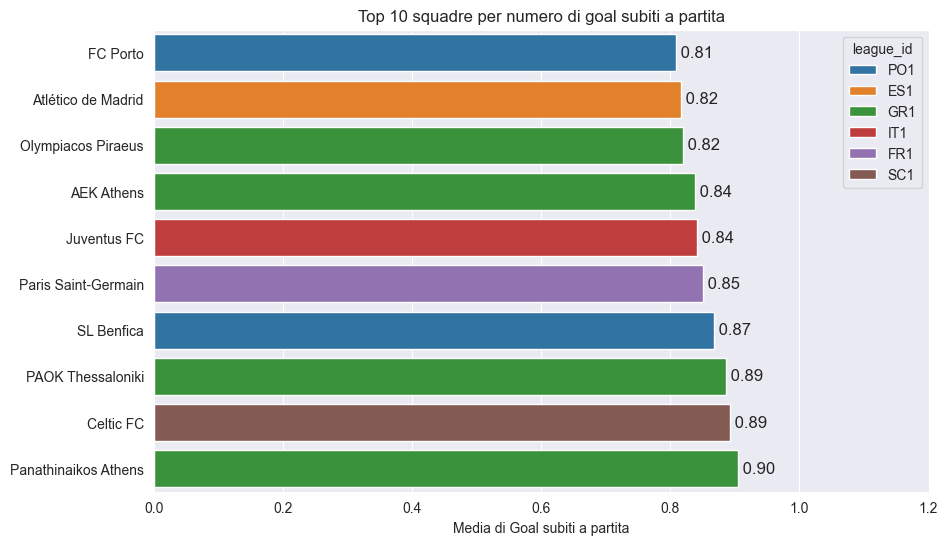

In [66]:
# top 10 squadre con meno goal subiti a partita

# top 10 squadre per numero di goal segnati
total_games = club_games_df['club_id'].value_counts().reset_index()
total_games.columns = ['club_id', 'total_games']

goals_conceded_by_club = club_games_df.groupby('club_id')['opponent_goals'].sum().reset_index()

club_stats = pd.merge(total_games, goals_conceded_by_club, on='club_id')

club_stats['goals_conceded_per_game'] = club_stats['opponent_goals'] / club_stats['total_games']

club_stats = club_stats.merge(clubs_df[['club_id', 'club_name', 'league_id']], on='club_id')

top10_clubs = club_stats.sort_values(by='goals_conceded_per_game', ascending=True).head(10)


plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top10_clubs, x='goals_conceded_per_game', y='club_name', hue='league_id')

for i, (value, name) in enumerate(zip(top10_clubs['goals_conceded_per_game'], top10_clubs['club_name'])):
    ax.text(value, i, f" {value:.2f}", ha="left", va='center', fontsize=12)

plt.title('Top 10 squadre per numero di goal subiti a partita')
plt.xlabel('Media di Goal subiti a partita')
plt.ylabel('')
plt.xlim(0,1.2)
plt.show()

In [67]:
clubs_df.query('club_name == "Bayern Munich"')

,club_id,club_code,full_club_name,league_id,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,last_season,url,market_value_in_eur,total_market_value_mln,coach_name,club_name
366,27,fc-bayern-munchen,FC Bayern München,L1,25,26.8,13,52.0,17,Allianz Arena,75024,+€23.25m,2023,https://www.transfermarkt.co.uk/fc-bayern-munc...,897700000.0,897.7,Thomas Tuchel,Bayern Munich


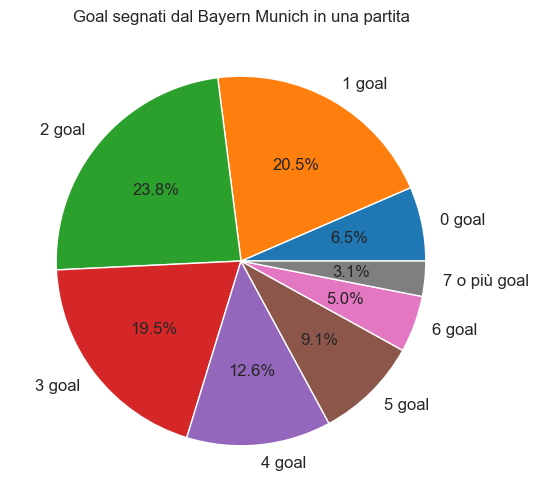

In [68]:
# distribuzione dei goal segnati da una singola squadra

bayern_games = club_games_df.query('club_id == 27')

goal_0 = bayern_games['club_goals'].value_counts()[0]
goal_1 = bayern_games['club_goals'].value_counts()[1]
goal_2 = bayern_games['club_goals'].value_counts()[2]
goal_3 = bayern_games['club_goals'].value_counts()[3]
goal_4 = bayern_games['club_goals'].value_counts()[4]
goal_5 = bayern_games['club_goals'].value_counts()[5]
goal_6 = bayern_games['club_goals'].value_counts()[6]
more_7 = len(bayern_games.query('club_goals >= 7'))

labels = ['0 goal', '1 goal', '2 goal', '3 goal', '4 goal', '5 goal', '6 goal', '7 o più goal']
prc = [goal_0, goal_1, goal_2, goal_3, goal_4, goal_5, goal_6, more_7]

plt.figure(figsize=(6,6))
plt.pie(prc,labels = labels, autopct= '%1.1f%%', textprops={'fontsize': 12})
plt.title('Goal segnati dal Bayern Munich in una partita')
plt.show()